***CODER HOUSE***

**Data Science**

**Patricio Emmanuel Dueñas**

**Pre-Entrega**

-El data set sera formado usando la libreria de Python "LanusStasts" que recopila datos estadisticos de varios sitios web dedicados al Futbol.

-La idea en principio es armar un mecanismo por el cual se pueda predecir que jugador es el mejor reemplazo en una posicion determinada a la hora de hacer incorporaciones en un determinado plantel.

In [2]:
#Se instala la libreria "LanusStats"

In [3]:
pip install --upgrade LanusStats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.7 MB/s eta 0:00:00


In [4]:
#Se importan las librerias que seran utilizadas
import pandas as pd
import numpy as np
import seaborn as sn
import LanusStats as ls


In [5]:
fbref = ls.Fbref()
ls.get_available_season_for_leagues ('Fbref', 'Primera Division Argentina')

{'id': 21,
 'slug': 'Primera-Division',
 'seasons': {'2021', '2022', '2023', '2024'}}

In [6]:
#En principio solo descubri como llamar a una liga a la vez nada mas pero la idea seria poder incorporar mas ligas para sumar mayor cantidad de datos

df= fbref.get_all_player_season_stats ('Primera Division Argentina','2021')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [7]:
df_players = df[0]

In [8]:
df_players.head(8)

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG,misc_Recov,misc_Won,misc_Lost,misc_Won%
0,Gonzalo Abrego,ar ARG,MF,Godoy Cruz,Primera Division Argentina,21,2000,21,18,"1,497",...,18,12,7,0,0,0,99,32,29,52.5
1,Jonás Acevedo,ar ARG,"MF,FW",Huracán,Primera Division Argentina,23,1997,18,10,898,...,87,6,3,0,0,0,46,6,15,28.6
2,Lucas Acevedo,ar ARG,DF,Platense,Primera Division Argentina,29,1991,11,10,911,...,0,18,12,0,0,0,57,30,21,58.8
3,Nelson Acevedo,ar ARG,MF,Godoy Cruz,Primera Division Argentina,32,1988,23,22,"1,827",...,2,27,35,0,0,0,217,16,14,53.3
4,Patricio Acevedo,ar ARG,DF,Newell's OB,Primera Division Argentina,18,2002,1,1,61,...,0,2,1,0,0,0,3,2,0,100.0
5,Guillermo Acosta,ar ARG,MF,Atlé Tucumán,Primera Division Argentina,32,1988,20,16,"1,401",...,31,17,11,0,0,0,131,18,24,42.9
6,Lautaro Acosta,ar ARG,MF,Lanús,Primera Division Argentina,32,1988,19,18,"1,347",...,20,11,12,1,0,0,76,34,39,46.6
7,Lucas Acosta,ar ARG,GK,Lanús,Primera Division Argentina,25,1995,13,13,"1,170",...,0,2,0,0,0,1,4,5,0,100.0


In [9]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Columns: 238 entries, Player to misc_Won%
dtypes: object(238)
memory usage: 1.4+ MB


In [10]:
df_players.shape

(775, 238)

In [11]:
print (df_players)

               Player stats_Nation stats_Pos    stats_Squad  \
0      Gonzalo Abrego       ar ARG        MF     Godoy Cruz   
1       Jonás Acevedo       ar ARG     MF,FW        Huracán   
2       Lucas Acevedo       ar ARG        DF       Platense   
3      Nelson Acevedo       ar ARG        MF     Godoy Cruz   
4    Patricio Acevedo       ar ARG        DF    Newell's OB   
..                ...          ...       ...            ...   
770   Nadir Zeineddin       ar ARG        FW       Platense   
771       Kevin Zenon       ar ARG     FW,MF          Unión   
772    Bruno Zuculini       ar ARG     MF,DF    River Plate   
773    Fernando Zuqui       ar ARG        MF    Estudiantes   
774      Mauro Zurita       ar ARG        DF  Independiente   

                     stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
0    Primera Division Argentina        21       2000       21           18   
1    Primera Division Argentina        23       1997       18           10   
2    Prim

In [12]:
df_players.describe()

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG,misc_Recov,misc_Won,misc_Lost,misc_Won%
count,775,775,775,775,775,775,775,775,775,775,...,775,775,775,775,775,775,775,775,775,775
unique,767,17,10,26,1,27,27,25,26,591,...,98,49,45,3,4,3,159,74,69,272
top,Matías Sosa,ar ARG,DF,Boca Juniors,Primera Division Argentina,21,2000,1,0,1,...,0,0,0,0,0,0,0,0,0,0
freq,2,679,232,45,775,79,78,61,108,11,...,201,141,128,730,710,753,31,97,84,55


In [13]:
list(df_players.columns)

['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_G+A-PK',
 'stats_xG',
 'stats_xAG',
 'stats_xG+xAG',
 'stats_npxG',
 'stats_npxG+xAG',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation',
 'passing_Pos'

In [14]:
nun_missing = (df_players[['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_G+A-PK',
 'stats_xG',
 'stats_xAG',
 'stats_xG+xAG',
 'stats_npxG',
 'stats_npxG+xAG',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation',
 'passing_Pos',
 'passing_Squad',
 'passing_Comp',
 'passing_Age',
 'passing_Born',
 'passing_90s',
 'passing_Cmp',
 'passing_Att',
 'passing_Cmp%',
 'passing_TotDist',
 'passing_PrgDist',
 'passing_Cmp',
 'passing_Att',
 'passing_Cmp%',
 'passing_Cmp',
 'passing_Att',
 'passing_Cmp%',
 'passing_Cmp',
 'passing_Att',
 'passing_Cmp%',
 'passing_Ast',
 'passing_xAG',
 'passing_xA',
 'passing_A-xAG',
 'passing_KP',
 'passing_1/3',
 'passing_PPA',
 'passing_CrsPA',
 'passing_PrgP',
 'passing_types_Nation',
 'passing_types_Pos',
 'passing_types_Squad',
 'passing_types_Comp',
 'passing_types_Age',
 'passing_types_Born',
 'passing_types_90s',
 'passing_types_Att',
 'passing_types_Live',
 'passing_types_Dead',
 'passing_types_FK',
 'passing_types_TB',
 'passing_types_Sw',
 'passing_types_Crs',
 'passing_types_TI',
 'passing_types_CK',
 'passing_types_In',
 'passing_types_Out',
 'passing_types_Str',
 'passing_types_Cmp',
 'passing_types_Off',
 'passing_types_Blocks',
 'gca_Nation',
 'gca_Pos',
 'gca_Squad',
 'gca_Comp',
 'gca_Age',
 'gca_Born',
 'gca_90s',
 'gca_SCA',
 'gca_SCA90',
 'gca_PassLive',
 'gca_PassDead',
 'gca_TO',
 'gca_Sh',
 'gca_Fld',
 'gca_Def',
 'gca_GCA',
 'gca_GCA90',
 'gca_PassLive',
 'gca_PassDead',
 'gca_TO',
 'gca_Sh',
 'gca_Fld',
 'gca_Def',
 'defense_Nation',
 'defense_Pos',
 'defense_Squad',
 'defense_Comp',
 'defense_Age',
 'defense_Born',
 'defense_90s',
 'defense_Tkl',
 'defense_TklW',
 'defense_Def 3rd',
 'defense_Mid 3rd',
 'defense_Att 3rd',
 'defense_Tkl',
 'defense_Att',
 'defense_Tkl%',
 'defense_Lost',
 'defense_Blocks',
 'defense_Sh',
 'defense_Pass',
 'defense_Int',
 'defense_Tkl+Int',
 'defense_Clr',
 'defense_Err',
 'possession_Nation',
 'possession_Pos',
 'possession_Squad',
 'possession_Comp',
 'possession_Age',
 'possession_Born',
 'possession_90s',
 'possession_Touches',
 'possession_Def Pen',
 'possession_Def 3rd',
 'possession_Mid 3rd',
 'possession_Att 3rd',
 'possession_Att Pen',
 'possession_Live',
 'possession_Att',
 'possession_Succ',
 'possession_Succ%',
 'possession_Tkld',
 'possession_Tkld%',
 'possession_Carries',
 'possession_TotDist',
 'possession_PrgDist',
 'possession_PrgC',
 'possession_1/3',
 'possession_CPA',
 'possession_Mis',
 'possession_Dis',
 'possession_Rec',
 'possession_PrgR',
 'playingtime_Nation',
 'playingtime_Pos',
 'playingtime_Squad',
 'playingtime_Comp',
 'playingtime_Age',
 'playingtime_Born',
 'playingtime_MP',
 'playingtime_Min',
 'playingtime_Mn/MP',
 'playingtime_Min%',
 'playingtime_90s',
 'playingtime_Starts',
 'playingtime_Mn/Start',
 'playingtime_Compl',
 'playingtime_Subs',
 'playingtime_Mn/Sub',
 'playingtime_unSub',
 'playingtime_PPM',
 'playingtime_onG',
 'playingtime_onGA',
 'playingtime_+/-',
 'playingtime_+/-90',
 'playingtime_On-Off',
 'playingtime_onxG',
 'playingtime_onxGA',
 'playingtime_xG+/-',
 'playingtime_xG+/-90',
 'playingtime_On-Off',
 'misc_Nation',
 'misc_Pos',
 'misc_Squad',
 'misc_Comp',
 'misc_Age',
 'misc_Born',
 'misc_90s',
 'misc_CrdY',
 'misc_CrdR',
 'misc_2CrdY',
 'misc_Fls',
 'misc_Fld',
 'misc_Off',
 'misc_Crs',
 'misc_Int',
 'misc_TklW',
 'misc_PKwon',
 'misc_PKcon',
 'misc_OG',
 'misc_Recov',
 'misc_Won',
 'misc_Lost',
 'misc_Won%']] == 0).sum()
print(nun_missing)

Player           0
stats_Nation     4
stats_Pos        0
stats_Squad      0
stats_Comp       0
                ..
misc_OG          0
misc_Recov       0
misc_Won         0
misc_Lost        0
misc_Won%       55
Length: 306, dtype: int64


In [15]:
print (df)

(               Player stats_Nation stats_Pos    stats_Squad  \
0      Gonzalo Abrego       ar ARG        MF     Godoy Cruz   
1       Jonás Acevedo       ar ARG     MF,FW        Huracán   
2       Lucas Acevedo       ar ARG        DF       Platense   
3      Nelson Acevedo       ar ARG        MF     Godoy Cruz   
4    Patricio Acevedo       ar ARG        DF    Newell's OB   
..                ...          ...       ...            ...   
770   Nadir Zeineddin       ar ARG        FW       Platense   
771       Kevin Zenon       ar ARG     FW,MF          Unión   
772    Bruno Zuculini       ar ARG     MF,DF    River Plate   
773    Fernando Zuqui       ar ARG        MF    Estudiantes   
774      Mauro Zurita       ar ARG        DF  Independiente   

                     stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
0    Primera Division Argentina        21       2000       21           18   
1    Primera Division Argentina        23       1997       18           10   
2    Pri

Gettings player percentiles...
Starting to plot...


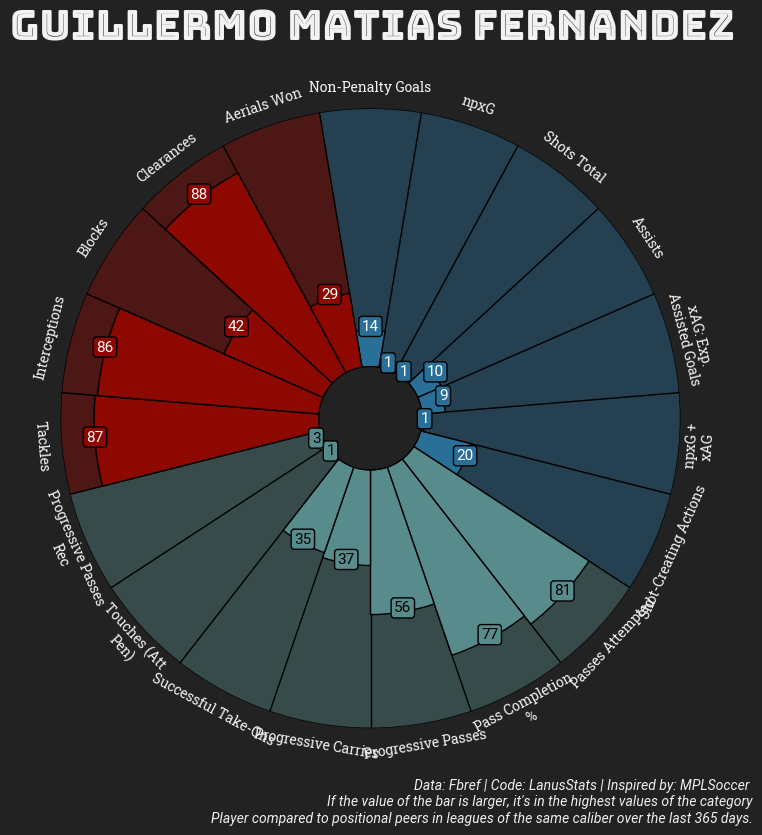

In [16]:
ls.visualizations.fbref_plot_player_percentiles('https://fbref.com/en/players/24377e64/Guillermo-Matias-Fernandez')

In [17]:
ls.get_available_leagues('Fbref')

['Copa de la Liga',
 'Primera Division Argentina',
 'Primera Division Uruguay',
 'Brasileirao',
 'Brasileirao B',
 'Primera Division Colombia',
 'Primera Division Chile',
 'Primera Division Peru',
 'Primera Division Venezuela',
 'Primera Division Ecuador',
 'Primera Division Bolivia',
 'Primera Division Paraguay',
 'Brasileirao F',
 'MLS',
 'USL Championship',
 'Premier League',
 'La Liga',
 'Ligue 1',
 'Bundesliga',
 'Serie A',
 'Big 5 European Leagues',
 'Danish Superliga',
 'Eredivise',
 'Primeira Liga Portugal',
 'Copa America',
 'Euros',
 'Saudi League',
 'EFL Championship',
 'La Liga 2',
 'Belgian Pro League',
 'Challenger Pro League',
 '2. Bundesliga',
 'Ligue 2',
 'Serie B',
 'J1 League',
 'NSWL',
 'Wowens Super League',
 'Liga F',
 'Premier Division South Africa',
 'Champions League',
 'Europa League',
 'Conference League',
 'Copa Libertadores',
 'Liga MX']

In [18]:
df1= fbref.get_all_player_season_stats ('Primera Division Chile','2021')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [19]:
df_players1= df1[0]

In [20]:
df_players1.head(8)

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_2CrdY,misc_Fls,misc_Fld,misc_Off,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG
0,Joe Abrigo,cl CHI,MF,Ñublense,Primera Division Chile,25,1995,13,6,581,...,0,6,24,1,23,4,4,0.0,0.0,0
1,Joe Abrigo,cl CHI,MF,Unión Española,Primera Division Chile,25,1995,6,1,162,...,0,6,24,1,23,4,4,0.0,0.0,0
2,Nicolás Abu Ghosh,ps PLE,FW,Palestino,Primera Division Chile,20,2000,8,2,182,...,0,2,4,2,3,0,3,0.0,0.0,0
3,Albert Acevedo,cl CHI,DF,O'Higgins,Primera Division Chile,37,1983,17,14,"1,062",...,1,9,9,0,2,28,10,0.0,0.0,0
4,Diego Acevedo,cl CHI,"MF,FW",Unión Española,Primera Division Chile,19,2001,9,7,539,...,0,4,4,0,16,8,5,0.0,0.0,0
5,Nicolás Aedo,cl CHI,"MF,FW",Audax Italiano,Primera Division Chile,19,2001,7,5,321,...,0,0,2,0,10,5,1,0.0,0.0,0
6,Facundo Aguero,ar ARG,DF,La Serena,Primera Division Chile,26,1995,25,23,"2,031",...,0,22,14,1,0,50,28,0.0,0.0,0
7,Eric Ahumada,cl CHI,DF,Antofagasta,Primera Division Chile,26,1994,8,5,497,...,0,4,2,0,0,7,10,0.0,0.0,0


In [21]:
df_players1.shape

(543, 206)

In [22]:
ls.get_available_season_for_leagues('Fbref','Primera Division Colombia')

{'id': 41, 'slug': 'Primera-A', 'seasons': {'2021', '2022', '2023', '2024'}}

In [23]:
df2= fbref.get_all_player_season_stats ('Primera Division Colombia','2021')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [24]:
df_players2= df2[0]

In [25]:
df_players2.shape

(765, 206)

In [26]:
df_players2['stats_Min']

,stats_Min
0,"2,837"
1,270
2,107
3,"2,230"
4,583
...,...
760,"1,672"
761,"1,865"
762,767
763,"1,493"
